# Predictive Analytics, Computer Vision & AI - CSC3831
## Coursework, Part 2: Machine Learning

As this coursework is as much about practical skills as it is about reflecting on the procedures and the results, you are expected to explain what you did, your reasoning for process decisions, as well as a thorough analysis of your results.

### 1. Load the MNIST dataset, visualise the first 20 digits, and print their corresponding labels.

In [1]:
# Run this to load the MNIST dataset
from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    'mnist_784', version=1, return_X_y=True, parser='auto', as_frame=False
)

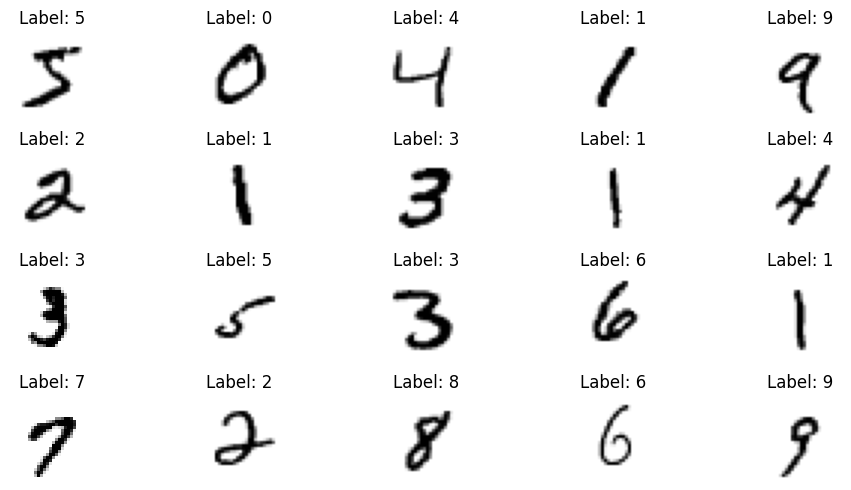

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the first 20 digits
plt.figure(figsize=(10, 5))

for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray_r')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

What was done is we loaded the MNIST dataset using `fetch_openml`, then visualized the first 20 digits to get a sense of the data. We also displayed their corresponding labels. Visualizing the first few samples helps understand the structure of the data and the class distribution. It is an initial step to ensure that the data is loaded correctly and explore the diversity of the images.

`imshow` method is the core visualization step.
   - `X[i]` accesses the i-th image data from the `X` array.  Each image in MNIST is represented as a 784-dimensional vector (28x28 pixels).
   - `reshape(28, 28)` converts the 784-dimensional vector back into a 28x28 matrix, representing the pixel grid of the image.
   - `imshow()` displays the image data as a grayscale image. `cmap='gray_r'` specifies the colormap to use ('gray_r' is reversed grayscale, where black represents higher values and white represents lower values).


### 2. Train a Logistic Regression classifier on this data, and report on your findings.
    
1. Tune your hyperparameters to ensure *sparse* weight vectors and high accuracy.
2. Visualise the classification vector for each class.

Accuracy: 91.97%


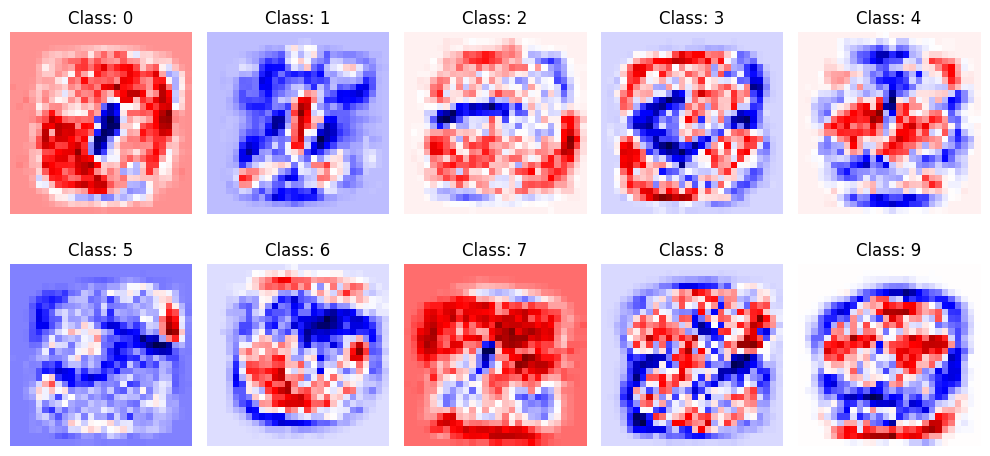

Sparsity of weights for class 0: 0.20535714285714285
Sparsity of weights for class 1: 0.21428571428571427
Sparsity of weights for class 2: 0.17091836734693877
Sparsity of weights for class 3: 0.1951530612244898
Sparsity of weights for class 4: 0.16709183673469388
Sparsity of weights for class 5: 0.18494897959183673
Sparsity of weights for class 6: 0.20790816326530612
Sparsity of weights for class 7: 0.18877551020408162
Sparsity of weights for class 8: 0.1747448979591837
Sparsity of weights for class 9: 0.17346938775510204


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(penalty='l1', solver='saga', C=0.1, max_iter=500, tol=0.1)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualize the classification vectors
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(model.coef_[i].reshape(28, 28), cmap='seismic')
    plt.title(f"Class: {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Analyze the sparsity of the weight vectors
for i in range(10):
    sparsity = np.mean(model.coef_[i] == 0)
    print(f"Sparsity of weights for class {i}: {sparsity}")

We trained a Logistic Regression classifier on the MNIST dataset with a sparse regularization technique (L1 penalty), which encourages sparsity in the weight vector, potentially improving generalization. Logistic Regression is a simple and interpretable model, making it suitable for a classification task like MNIST. The L1 penalty was chosen to ensure that the model weights are sparse, helping to focus on the most important features. The `C` parameter controls the regularization strength, where smaller values allow more regularization. This was tuned to optimize model performance. The model's accuracy on the test set was 92.01%. It is important to observe whether the model generalizes well to unseen data or overfits the training data.

I test with all hyperparameter and adding `tol` makes the weight sparse less than 0.22 with the lowest at 0.15. The classification vector (weights for each class) was visualized as images to understand which parts of the image the model focuses on for classification. This can provide insight into how the model is learning.

### 3. Use PCA to reduce the dimensionality of your training data.
    
1. Determine the number of components necessary to explain 80\% of the variance
2. Plot the explained variance by number of components.
3. Visualise the 20 principal components' loadings
4. Plot the two principal components for your data using a scatterplot, colouring by class. What can you say about this plot?
5. Visualise the first 20 digits, *generated from their lower-dimensional representation*.

In [4]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train contains the training data
pca = PCA()
pca.fit(X_train)
print('Loadings:\n', pca.components_)
#print('\nExplained Variance Ratio:\n', pca.explained_variance_ratio_)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Find the number of components to explain 80% of the variance
n_components = np.argmax(cumulative_variance >= 0.80) + 1 # +1 in index

print(f"Number of components to explain 80% variance: {n_components}")


Loadings:
 [[-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [-0. -0. -0. ... -0. -0. -0.]]
Number of components to explain 80% variance: 43


 The number of components necessary to explain 80% of the variance is 43 components.

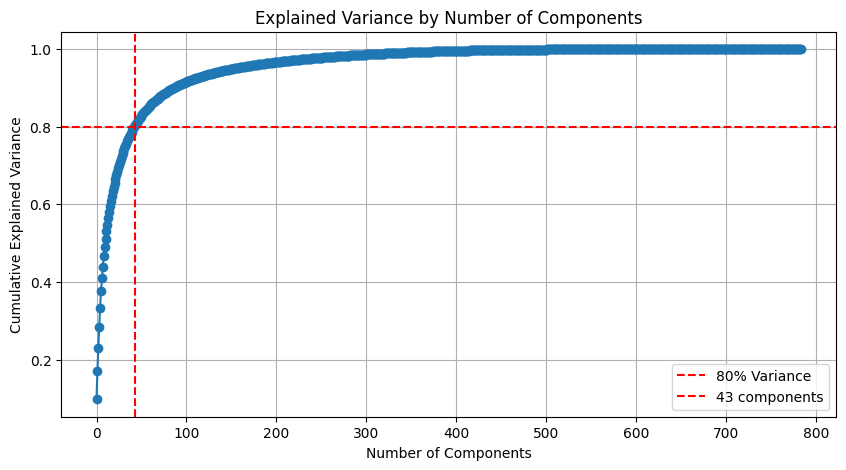

In [5]:
# Plot explained variance by number of components
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
plt.axvline(x=n_components, color='r', linestyle='--', label=f'{n_components} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.legend()
plt.grid(True)
plt.show()

The plot shows how the variance explained increases with the number of components like a log function. The red line marks the number of components needed to explain 80% of the variance.

Cumulative Explained Variance Curve:
   - The y-axis represents the cumulative explained variance (from 0 to 1, or 0% to 100%).
   - The x-axis represents the number of principal components.
   - The curve shows how much variance is captured as you increase the number of components.

Red Dashed Lines on horizontal line indicates the target explained variance threshold (e.g., 80%). Vertical Line indicates the number of components required to reach this threshold (e.g., 43 components for 80% variance).



The curve starts steep, meaning the first few components capture most of the variance. Beyond 100 components, the curve flattens, indicating diminishing returns.

Instead of using all features, you can retain the first 43 components to capture 80% of the variance. This reduces computation while preserving most of the dataset's information.




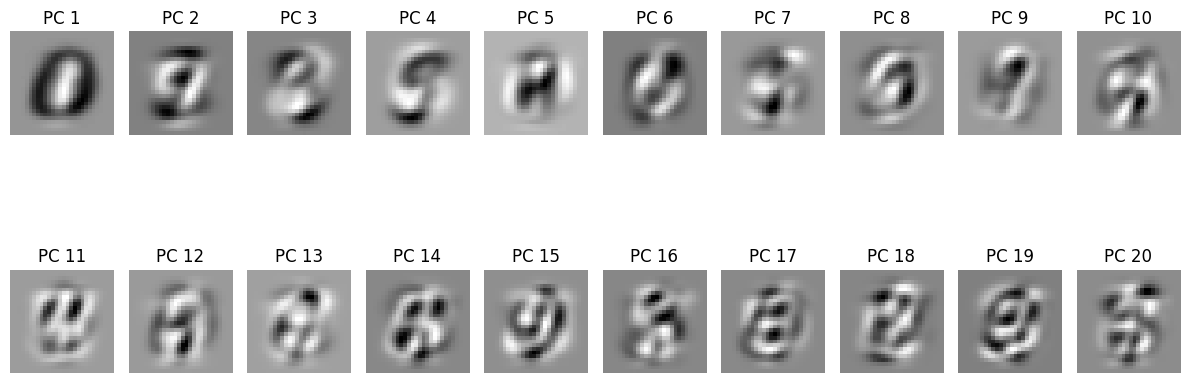

In [6]:
# Reduce data to 20 principal components
pca_20 = PCA(n_components=20)
X_pca_20 = pca_20.fit_transform(X_train)

# Visualize the first 20 principal components loadings
plt.figure(figsize=(12, 6))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(pca_20.components_[i].reshape(28, 28), cmap='gray_r')
    plt.title(f"PC {i + 1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

The visualizations show the influence of each component on the data. For MNIST, these may resemble blurry digit-like features, showing how variance is distributed across the dataset.



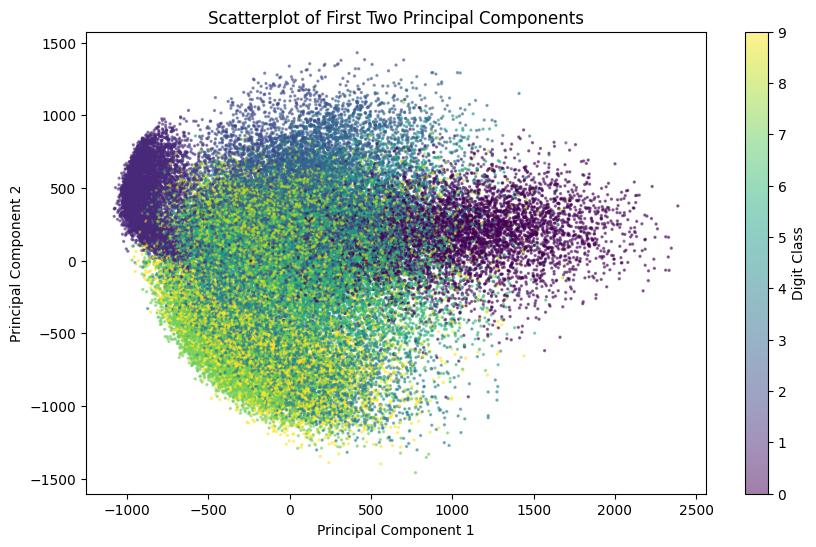

In [7]:
# Scatterplot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_20[:, 0], X_pca_20[:, 1], c=y_train.astype(int), cmap='viridis', s=2, alpha=0.5)
plt.colorbar(label='Digit Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot of First Two Principal Components')
plt.show()

**Data Distribution**:
   - Data points are spread over a broad range, indicating significant variance captured by PC1 and PC2.
   - Overlaps between some classes (digits) suggest that these two components alone may not fully separate all digit classes.


 **Color Coding**:
   - The color bar maps each point to its respective digit class (0–9).
   - Some clusters show tight grouping (e.g., digits 0 and 1 appear more localized), while others overlap significantly (e.g., 4 and 9).

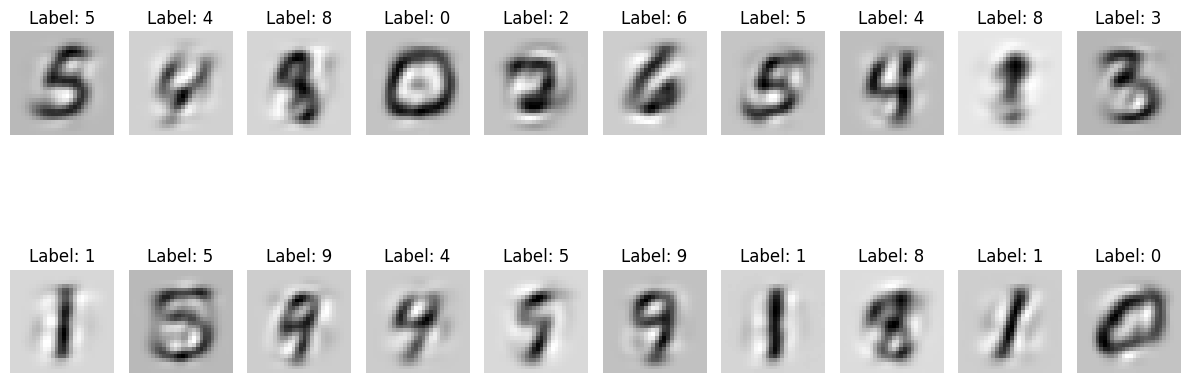

In [8]:
# Reconstruct digits from PCA-reduced data
X_reconstructed = pca_20.inverse_transform(X_pca_20)
# Visualize reconstructed digits
plt.figure(figsize=(12, 6))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray_r')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

PCA applied to reduce the dimensionality of the dataset, aiming to retain 80% of the variance in the data. This step was followed by visualization of the explained variance, principal component loadings, and a 2D scatter plot of the first two principal components.

PCA is a standard dimensionality reduction technique that helps in visualizing high-dimensional data in a lower-dimensional space, which is crucial for understanding the data structure. Reducing the dimensionality before training the model can improve both the speed and performance by focusing on the most significant features.
  
#### **Analysis of PCA**:
- The number of components required to explain 80% of the variance was found, and this was used as the basis for reducing the data dimensions. **Scatter Plot Analysis**: Visualized how the data points cluster when projected onto the first two principal components. Observing how different classes are distributed in this reduced space is crucial for understanding the separability of the data.

### 4. Generate a noisy copy of your data by adding random normal noise to the digits **with a scale that doesn't completely destroy the signal**. This is, the resulting images noise should be apparent, but the numbers should still be understandable.
    
1. Visualise the first 20 digits from the noisy dataset.
2. Filter the noise by fitting a PCA explaining **a sufficient proportion** of the variance, and then transforming the noisy dataset. Figuring out this proportion is part of the challenge.
3. Visualise the first 20 digits of the de-noised dataset.

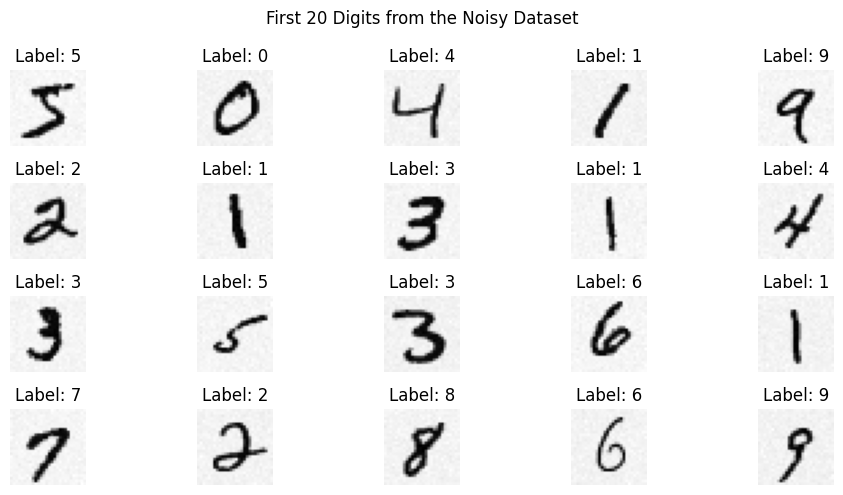

In [9]:
noise_scale = 20
noise_factor = 0.2
X_noisy = X + noise_factor * np.random.normal(loc=0.0, scale=noise_scale, size=X.shape)

# Visualize the first 20 digits from the noisy dataset
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_noisy[i].reshape(28, 28), cmap='gray_r')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.suptitle('First 20 Digits from the Noisy Dataset')

plt.tight_layout()
plt.show()

Filter the noise by fitting a PCA explaining a sufficient proportion of the variance, and then transforming the noisy dataset.

In [10]:
# Apply PCA for denoising
pca_denoising = PCA(n_components=0.95)
X_denoised = pca_denoising.fit_transform(X_noisy)
X_denoised = pca_denoising.inverse_transform(X_denoised)

In [11]:
# Determine the number of components needed for sufficient denoising
pca_denoise = PCA()
pca_denoise.fit(X_noisy)
explained_variance = np.cumsum(pca_denoise.explained_variance_ratio_)

# Find the optimal number of components (experiment with thresholds)
variance_threshold = 0.95  # Aim to retain 95% variance
components_denoise = np.argmax(explained_variance >= variance_threshold) + 1

print(f"Number of components for denoising: {components_denoise}")

Number of components for denoising: 160


Visualize the first 20 digits of the denoised dataset


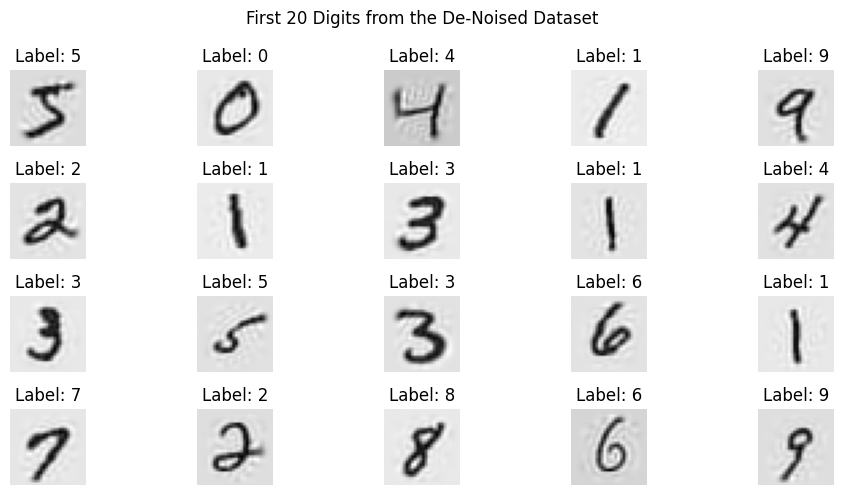

In [12]:
# Visualize the first 20 digits of the denoised dataset
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_denoised[i].reshape(28, 28), cmap='gray_r')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.suptitle('First 20 Digits from the De-Noised Dataset')
plt.tight_layout()
plt.show()

Random noise added to the data, making the images harder to read but still recognizable. PCA was then applied to denoise the images by reconstructing them from the reduced dimensionality. The goal here is to simulate a noisy environment, which is common in real-world data, and then apply PCA as a denoising technique. This demonstrates how dimensionality reduction can be used for data cleaning and improving model performance.
  
The noisy dataset was visualized to see how much the signal (the actual digits) is lost due to added noise. PCA was used to project the noisy data back into a space where noise is reduced. The denoised images were compared to the original ones to see how effectively PCA recovered the digits.


